In [1]:
import json

In [2]:
with open(r"C:\Users\Fiasco\Desktop\LLM-DrugApprovalPredictor\trainer_state.json", "r") as json_file:
    json_data = json.load(json_file)


In [3]:

# Extract log history from the JSON data
data = json_data["log_history"]


In [4]:
data

[{'completion_length': 708.75,
  'epoch': 0.00040048057669203043,
  'grad_norm': 0.1413433700799942,
  'kl': 0.0,
  'learning_rate': 0.0,
  'loss': 0.0,
  'reward': 5.807499885559082,
  'reward_std': 5.097541332244873,
  'rewards/confident_score_func': 3.5,
  'rewards/correctness_reward_func': 2.25,
  'rewards/int_reward_func': 0.5,
  'rewards/int_score_reward_func': 0.5,
  'rewards/soft_format_reward_func': 0.25,
  'rewards/xmlcount_reward_func': -1.192500114440918,
  'step': 1},
 {'completion_length': 578.25,
  'epoch': 0.0008009611533840609,
  'grad_norm': 0.19208469986915588,
  'kl': 0.0,
  'learning_rate': 5.0000000000000004e-08,
  'loss': 0.0,
  'reward': 1.6972501277923584,
  'reward_std': 1.8320335149765015,
  'rewards/confident_score_func': 0.5,
  'rewards/correctness_reward_func': 0.75,
  'rewards/int_reward_func': 0.5,
  'rewards/int_score_reward_func': 0.375,
  'rewards/soft_format_reward_func': 0.5,
  'rewards/xmlcount_reward_func': -0.9277499914169312,
  'step': 2},
 {'co

In [5]:

# Extract steps and losses from the data
steps = [entry["step"] for entry in data if "step" in entry and "loss" in entry]


In [6]:
import matplotlib.pyplot as plt 

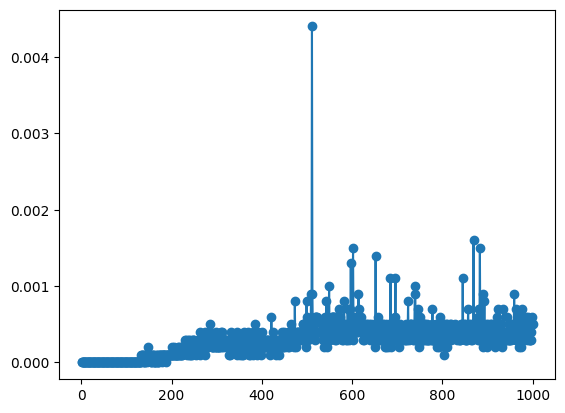

In [7]:
losses_t = [entry["loss"] for entry in data if "step" in entry and "loss" in entry]
plt.plot(steps, losses_t, marker="o", label="Training Loss")

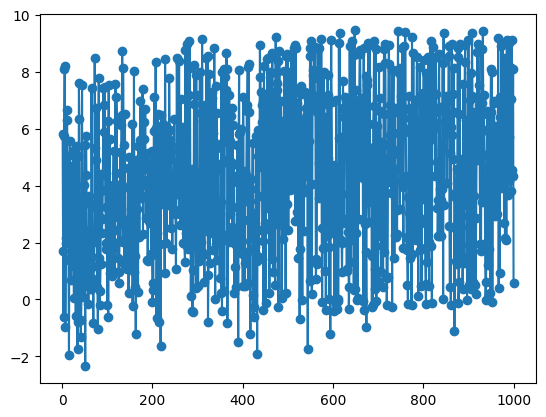

In [8]:
reward = [entry["reward"] for entry in data if "step" in entry and "loss" in entry]
plt.plot(steps, reward, marker="o", label="Training Loss")

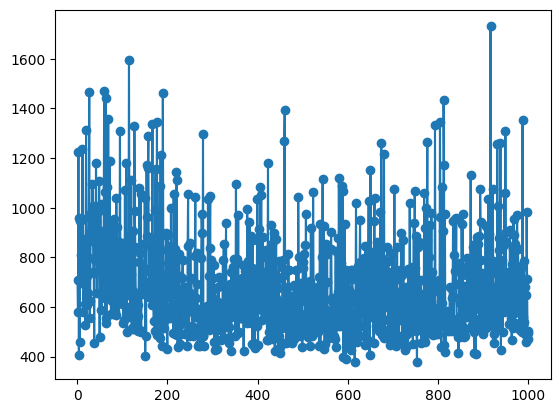

In [9]:
completion_length = [entry["completion_length"] for entry in data if "step" in entry and "loss" in entry]
plt.plot(steps, completion_length, marker="o", label="Training Loss")

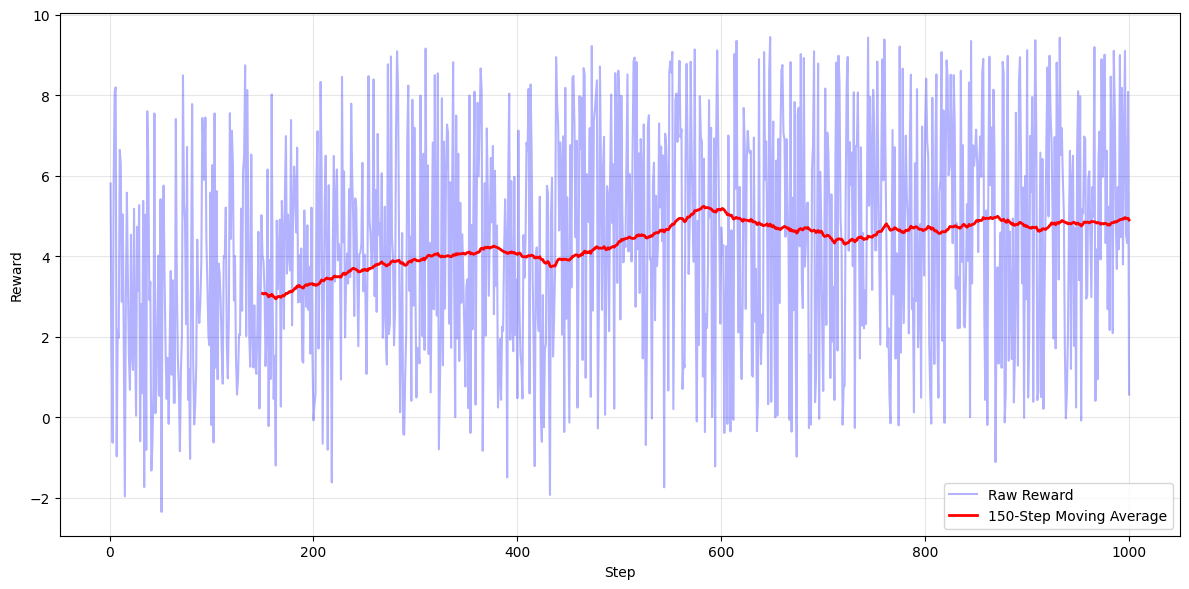

In [13]:
import pandas as pd 
df = pd.DataFrame({'Step': steps, 'Reward': reward})

# Calculate moving average with window size of 10
window_size = 150
df['Moving_Avg'] = df['Reward'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot raw rewards
plt.plot(df['Step'], df['Reward'], alpha=0.3, label='Raw Reward', color='blue')

# Plot moving average
plt.plot(df['Step'], df['Moving_Avg'], label=f'{window_size}-Step Moving Average', 
         color='red', linewidth=2)

plt.xlabel('Step')
plt.ylabel('Reward')
# plt.title('Moving Average')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()